In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
TRAIN= pd.read_csv('/kaggle/input/titanic/train.csv', na_values=['?','#',' '])

In [3]:
TRAIN.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TRAIN.shape

(891, 12)

In [5]:
TRAIN.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
to_drop=['PassengerId','Name','Ticket','Cabin']
cat=['Pclass','Sex','SibSp','Parch','Embarked']
num=['Age','Fare']

In [7]:
TRAIN.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
TRAIN.drop(to_drop, axis=1, inplace=True)

In [9]:
TRAIN.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
TRAIN[cat] = TRAIN[cat].astype('category')

In [11]:
TRAIN['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
TRAIN['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

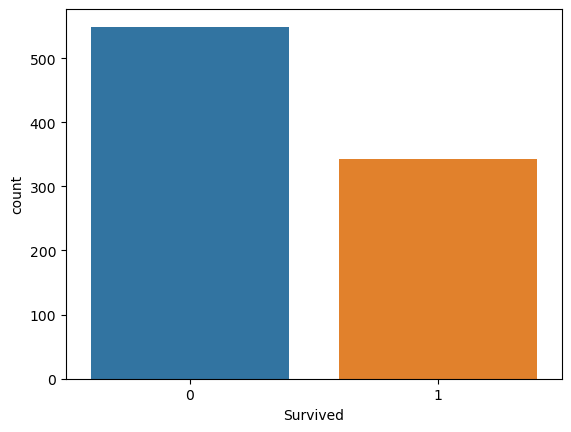

In [13]:
#count plot on single categorical variable
sns.countplot(x ='Survived', data = TRAIN)
plt.show()

In [14]:
TRAIN.dtypes

Survived       int64
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

[[<AxesSubplot:title={'center':'Survived'}>
  <AxesSubplot:title={'center':'Age'}>]
 [<AxesSubplot:title={'center':'Fare'}> <AxesSubplot:>]]


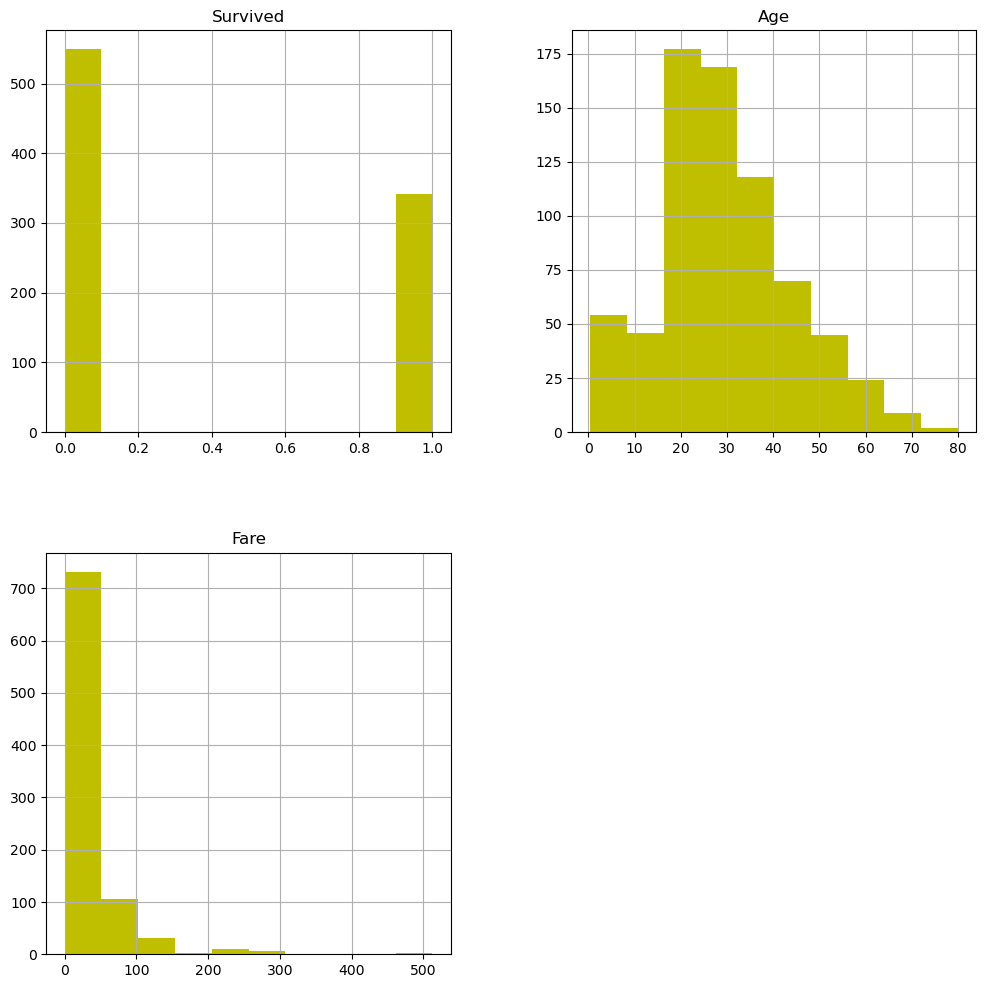

In [15]:
print(TRAIN.hist(figsize=(12,12),color="y"))

<AxesSubplot:xlabel='Pclass', ylabel='count'>

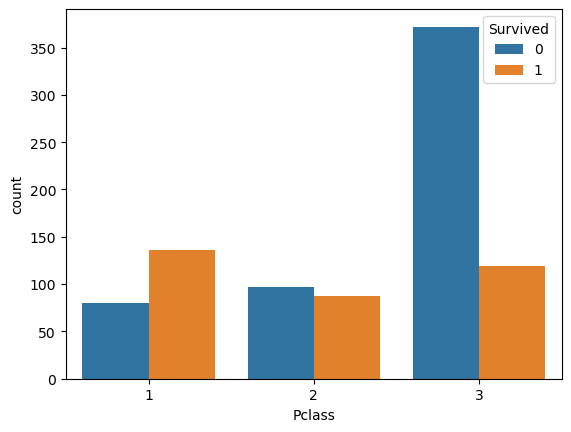

In [16]:
sns.countplot(data=TRAIN, x="Pclass", hue="Survived")

In [17]:
TRAIN.shape

(891, 8)

In [18]:
TRAIN.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [19]:
Q1 = TRAIN[num].quantile(0.25)
Q3 = TRAIN[num].quantile(0.75)
IQR = Q3 - Q1

In [20]:
upp_bou = (Q3 + 1.5*IQR)
low_bou = (Q1-1.5*IQR)

In [21]:
upp_bou

Age     64.8125
Fare    65.6344
dtype: float64

In [22]:
low_bou

Age     -6.6875
Fare   -26.7240
dtype: float64

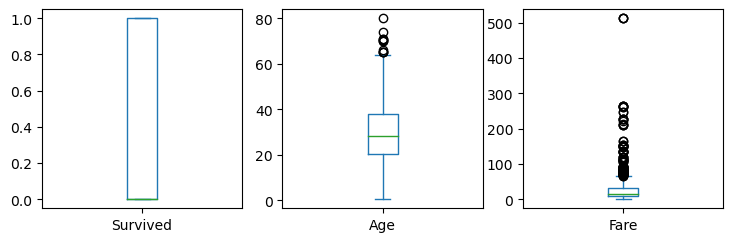

In [23]:
TRAIN.plot(kind='box', subplots =True , sharex=False, sharey=False, layout=(5,5), figsize=(15,15))
plt.show()

In [24]:
TRAIN.shape

(891, 8)

Text(0, 0.5, 'COUNT')

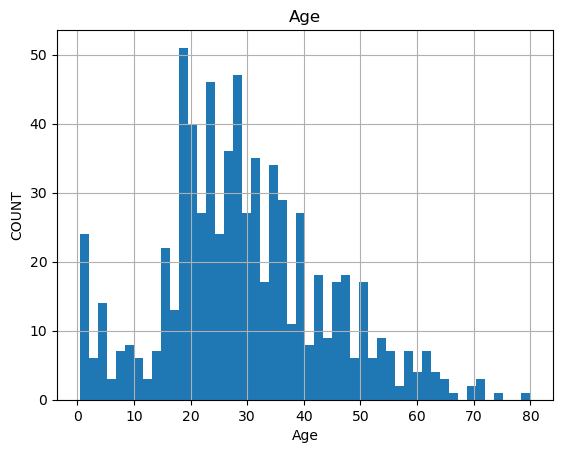

In [25]:
fig=TRAIN['Age'].hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('COUNT')

In [26]:
indexAge = TRAIN[(TRAIN['Age'] < low_bou['Age']) |(TRAIN['Age'] > upp_bou['Age'])].index
TRAIN.drop(indexAge , inplace=True)

In [27]:
TRAIN.shape

(880, 8)

Text(0, 0.5, 'COUNT')

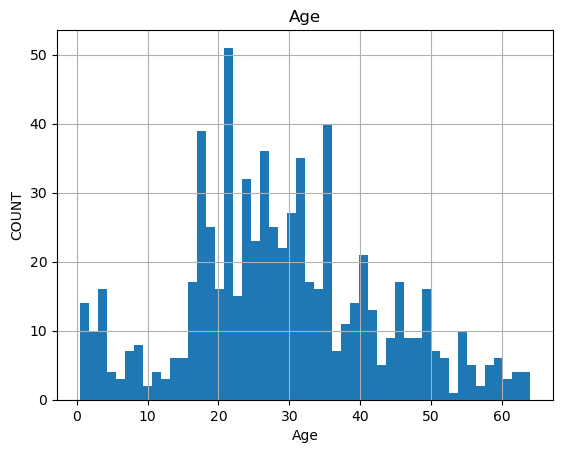

In [28]:
fig=TRAIN['Age'].hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('COUNT')

Text(0, 0.5, 'COUNT')

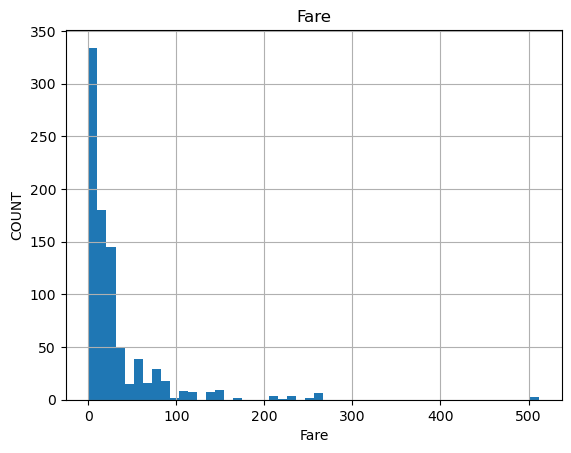

In [29]:
fig=TRAIN['Fare'].hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('COUNT')

In [30]:
indexAge = TRAIN[(TRAIN['Fare'] < low_bou['Fare']) |(TRAIN['Fare'] > upp_bou['Fare'])].index
TRAIN.drop(indexAge , inplace=True)

In [31]:
TRAIN.shape

(765, 8)

Text(0, 0.5, 'COUNT')

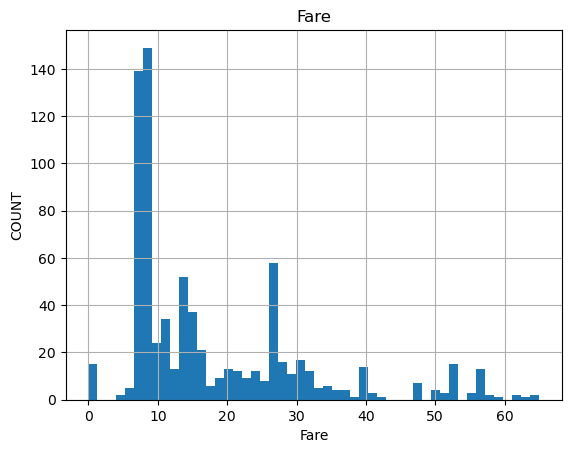

In [32]:
fig=TRAIN['Fare'].hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('COUNT')

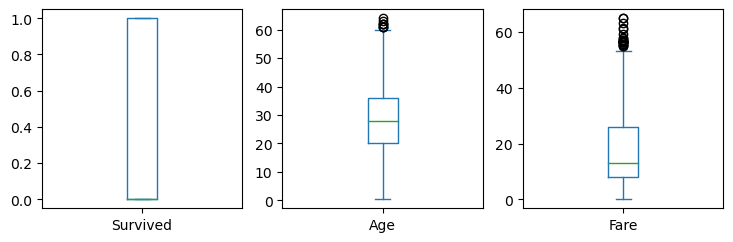

In [33]:
TRAIN.plot(kind='box', subplots =True , sharex=False, sharey=False, layout=(5,5), figsize=(15,15))
plt.show()

In [34]:
y=TRAIN['Survived']

In [35]:
x_train, x_test , y_train , y_test = train_test_split(TRAIN.loc[:,TRAIN.columns !='Survived'], TRAIN.loc[:,'Survived'], stratify=y,test_size=0.3, random_state=123)

In [36]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
55,1,male,NaN,0,0,35.5000,S
621,1,male,42.0,1,0,52.5542,S
58,2,female,5.0,1,2,27.7500,S
152,3,male,55.5,0,0,8.0500,S
228,2,male,18.0,0,0,13.0000,S


In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(535, 7)
(535,)
(230, 7)
(230,)


In [38]:
x_train.dtypes

Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [39]:
x_train_num =  x_train_num = x_train[num]
x_test_num =  x_test_num = x_test[num]

x_train_cat =x_train[cat]
x_test_cat =x_test[cat]

In [40]:
x_train.isna().sum()

Pclass        0
Sex           0
Age         113
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [43]:
x_train_num = pd.DataFrame(num_imputer.fit_transform(x_train_num), columns=x_train_num.columns)
x_test_num = pd.DataFrame(num_imputer.transform(x_test_num), columns=x_test_num.columns)

In [44]:
x_train_cat = pd.DataFrame(cat_imputer.fit_transform(x_train_cat), columns = x_train_cat.columns)
x_test_cat = pd.DataFrame(cat_imputer.transform(x_test_cat), columns=x_test_cat.columns)

In [45]:
x_train_num.isna().sum()

Age     0
Fare    0
dtype: int64

In [46]:
x_train_cat.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler ,OneHotEncoder

In [48]:
std = StandardScaler()

In [49]:
x_train_num = pd.DataFrame(std.fit_transform(x_train_num), columns=x_train_num.columns)
x_test_num = pd.DataFrame(std.transform(x_test_num), columns=x_test_num.columns)

In [50]:
x_train_num.head()

,Age,Fare
0,3.107660e-16,1.285616
1,1.275145e+00,2.540661
2,-1.961351e+00,0.715282
3,2.456029e+00,-0.734472
4,-8.242038e-01,-0.370193


In [51]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [52]:
x_train_cat = pd.DataFrame(ohe.fit_transform(x_train_cat).todense(), columns=ohe.get_feature_names_out())
x_test_cat = pd.DataFrame(ohe.transform(x_test_cat).todense(), columns=ohe.get_feature_names_out())

In [53]:
x_train_cat.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
Train = pd.concat([x_train_num, x_train_cat], axis=1)

In [55]:
Train.shape

(535, 23)

In [56]:
validation = pd.concat([x_test_num, x_test_cat], axis=1)

In [57]:
validation.shape

(230, 23)

In [58]:
y_train=y_train.astype('category')
y_test= y_test.astype('category')

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression(class_weight='balanced')

In [61]:
model.fit(Train, y_train)

LogisticRegression(class_weight='balanced')

In [62]:
train_pred = model.predict(Train)

In [63]:
validation_pred = model.predict(validation)

In [64]:
from sklearn.metrics import confusion_matrix , classification_report ,f1_score ,recall_score , precision_score ,accuracy_score


In [65]:
print(confusion_matrix(y_train, train_pred))

[[287  65]
 [ 45 138]]


In [66]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       352
           1       0.68      0.75      0.72       183

    accuracy                           0.79       535
   macro avg       0.77      0.78      0.78       535
weighted avg       0.80      0.79      0.80       535



In [67]:
print('Recall :' ,recall_score(y_train , train_pred))
print('Precision :' ,precision_score(y_train , train_pred))
print('f1_score :' ,f1_score(y_train , train_pred))
print('accuracy_score :' ,accuracy_score(y_train , train_pred))

Recall : 0.7540983606557377
Precision : 0.6798029556650246
f1_score : 0.7150259067357513
accuracy_score : 0.794392523364486


In [68]:
print(confusion_matrix(y_test, validation_pred))

[[124  27]
 [ 19  60]]


In [69]:
print(classification_report(y_test, validation_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       151
           1       0.69      0.76      0.72        79

    accuracy                           0.80       230
   macro avg       0.78      0.79      0.78       230
weighted avg       0.81      0.80      0.80       230



In [70]:
print('Recall :' ,recall_score(y_test , validation_pred))
print('Precision :' ,precision_score(y_test , validation_pred))
print('f1_score :' ,f1_score(y_test , validation_pred))
print('accuracy_score :' ,accuracy_score(y_test , validation_pred))

Recall : 0.759493670886076
Precision : 0.6896551724137931
f1_score : 0.7228915662650602
accuracy_score : 0.8


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbk = GradientBoostingClassifier()
gbk.fit(Train, y_train)
train_pred_gbk = gbk.predict(Train)
validation_pred_gbk = gbk.predict(validation)

In [73]:
print(confusion_matrix(y_train, train_pred_gbk))

[[340  12]
 [ 38 145]]


In [74]:
print(classification_report(y_train , train_pred_gbk))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       352
           1       0.92      0.79      0.85       183

    accuracy                           0.91       535
   macro avg       0.91      0.88      0.89       535
weighted avg       0.91      0.91      0.90       535



In [75]:
print('Recall :' ,recall_score(y_train , train_pred_gbk))
print('Precision :' ,precision_score(y_train , train_pred_gbk))
print('f1_score :' ,f1_score(y_train , train_pred_gbk))
print('accuracy_score :' ,accuracy_score(y_train , train_pred_gbk))

Recall : 0.7923497267759563
Precision : 0.9235668789808917
f1_score : 0.8529411764705883
accuracy_score : 0.9065420560747663


In [76]:
print(confusion_matrix(y_test, validation_pred_gbk))

[[135  16]
 [ 19  60]]


In [77]:
print(classification_report(y_test, validation_pred_gbk))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       151
           1       0.79      0.76      0.77        79

    accuracy                           0.85       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.85      0.85      0.85       230



In [78]:
print('Recall :' ,recall_score(y_test , validation_pred_gbk))
print('Precision :' ,precision_score(y_test , validation_pred_gbk))
print('f1_score :' ,f1_score(y_test , validation_pred_gbk))
print('accuracy_score :' ,accuracy_score(y_test , validation_pred_gbk))

Recall : 0.759493670886076
Precision : 0.7894736842105263
f1_score : 0.7741935483870968
accuracy_score : 0.8478260869565217


In [79]:
TEST= pd.read_csv('/kaggle/input/titanic/test.csv',na_values=['?','#',' '])

In [80]:
TEST.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [81]:
TEST[cat] = TEST[cat].astype('category')

In [82]:
TEST_num = TEST[num] # or x_train_num = x_train[num]

TEST_cat =TEST[cat]

In [83]:
TEST_num = pd.DataFrame(num_imputer.transform(TEST_num), columns=TEST_num.columns)

In [84]:
TEST_cat = pd.DataFrame(cat_imputer.transform(TEST_cat), columns=TEST_cat.columns)

In [85]:
TEST_num =  pd.DataFrame(std.transform(TEST_num), columns=TEST_num.columns)

In [86]:
TEST_cat = pd.DataFrame(ohe.transform(TEST_cat).todense(), columns=ohe.get_feature_names_out())

In [87]:
final = pd.concat([TEST_num, TEST_cat], axis=1)

In [88]:
final

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,6.190985e-01,-0.750721,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.712509e+00,-0.811743,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.024602e+00,-0.613965,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-3.694796e-02,-0.689397,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-4.743123e-01,-0.422627,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.107660e-16,-0.734472,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,1.012726e+00,6.687234,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,9.689900e-01,-0.793345,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,3.107660e-16,-0.734472,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
final.shape

(418, 23)

In [90]:
final_pred = gbk.predict(final)

In [91]:
final_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [92]:
Submission=TEST[['PassengerId']]

In [93]:
Submission['Survived']=final_pred
Submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [94]:
Submission.to_csv("titanicc.csv",index = None)

In [95]:
pd.read_csv('titanicc.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
